In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv('KDDTrain+.txt')
data.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [6]:
# missing columns added
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'
,'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])

data.columns = columns
# sanity check
data.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [8]:
# removing levelt to maintain original dataset integrity
data = data.drop('level', axis=1)

In [9]:
data.shape

(125972, 42)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [11]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack'],
      dtype='object')

# What does these columns mean?
## Features of network:
- 1. duration: time duration of the connection (quant.)
- 2. protocol type: protocol used in connection (cat., 3 categories)
- 3. service: destination network service used (cat., 70 categories)
- 4. flag: status of the connection (e.g. REJ = connection rejected) (cat., 11 categories)
- 5. src bytes: number of data bytes transferred from source to destination (quant.)
- 6. dst bytes: number of data bytes transferred from destination to source (quant.)
- 7. land: indicator whether port number and IP address of source and destination
are equal, if yes = 1, otherwise 0 (binary)
- 8. wrong fragment: number of wrong fragments in connection (quant.)
- 9. urgent: number of urgent packets (quant.)

## connection related features:
- 10. hot: number of ”hot” indicators in the content such as: entering a system directory, creating programs and executing programs (quant.)
- 11. num failed logins: number of failed login attempts (quant.)
- 12. logged in: 1 if successfully logged in, 0 otherwise (binary)
- 13. num compromised: number of ”compromised” conditions (quant.)
- 14. root shell: 1 if root shell is obtained, 0 otherwise (binary)
- 15. su attempted: 1 if ”su root” command attempted or used, 0 otherwise (quant.,
data set contains value 2)
- 16. num root: number of operations performed as a root or root accesses (quant.)
- 17. num file creations: number of file creation operations (quant.)
- 18. num shells: number of shell prompts (quant.)
- 19. num access files: number of operations on access control files (quant.)
- 20. num outbound cmds: number of outbound commands in an ftp session (quant.)
- 21. is host login: 1 if the login is from root or admin, 0 otherwise (binary)
- 22. is guest login: 1 if the login is from guest, 0 otherwise (binary)

## time related traffic features:
- 23. count: number of connections to the same destination host as the current connection in the past 2 seconds (quant.)
- 24. srv count: number of connections to the same service (port number) as the
current connection in the past 2 seconds (quant.)
- 25. serror rate: % of connections that have activated s0, s1, s2 or s3 flag (4) among
connections aggregated in count (quant.)
52
- 26. srv serror rate: % of connections that have activated s0, s1, s2 or s3 flag (4)
among connections aggregated in srv count (quant.)
- 27. rerror rate: % of connections that have activated REJ flag (4) among connections aggregated in count (quant.)
- 28. srv rerror rate: % of connections that have activated REJ flag (4) among connections aggregated in srv count (quant.)
-29. same srv rate: % of connections to the same service among those aggregated
in count (quant.)
- 30. diff srv rate: % of connections to the different service among those aggregated
in count (quant.)
- 31. srv diff host rate: % of connections that were to different destination machines
among the connections aggregated in srv count (quant.)

## host based traffic features:
- 32. dst host count: count of the connections having the same destination IP address (quant.)
- 33. dst host srv count: count of connections having the same port number (quant.)
- 34. dst host same srv rate: % of connections that were to different services, among
those in dst host count (quant.)
- 35. dst host diff srv rate: % of connections that were to different services, among
those in dst host count (quant.)
- 36 dst host same src port rate: % of connections that were to the same source
port, among those in dst host srv count (quant.)
54
- 37. dst host srv diff host rate: % of connections that were to different destination
machines, among those in dst host srv count (quant.)
- 38. dst host serror rate: % of connections that have activated the s0, s1, s2 or s3
flag (4), among those in dst host count (quant.)
- 39. dst host srv serror rate: % of connections that have activated the s0, s1, s2 or
s3 flag (4), among those in dst host srv count (quant.)
- 40. dst host rerror rate: % of connections that have activated the REJ flag (4),
among those in dst host count (quant.)
- 41. dst host srv rerror rate: % of connections that have activated the REJ flag (4),
among those in dst host srv count (quant.)

In [12]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Visualization Of Data

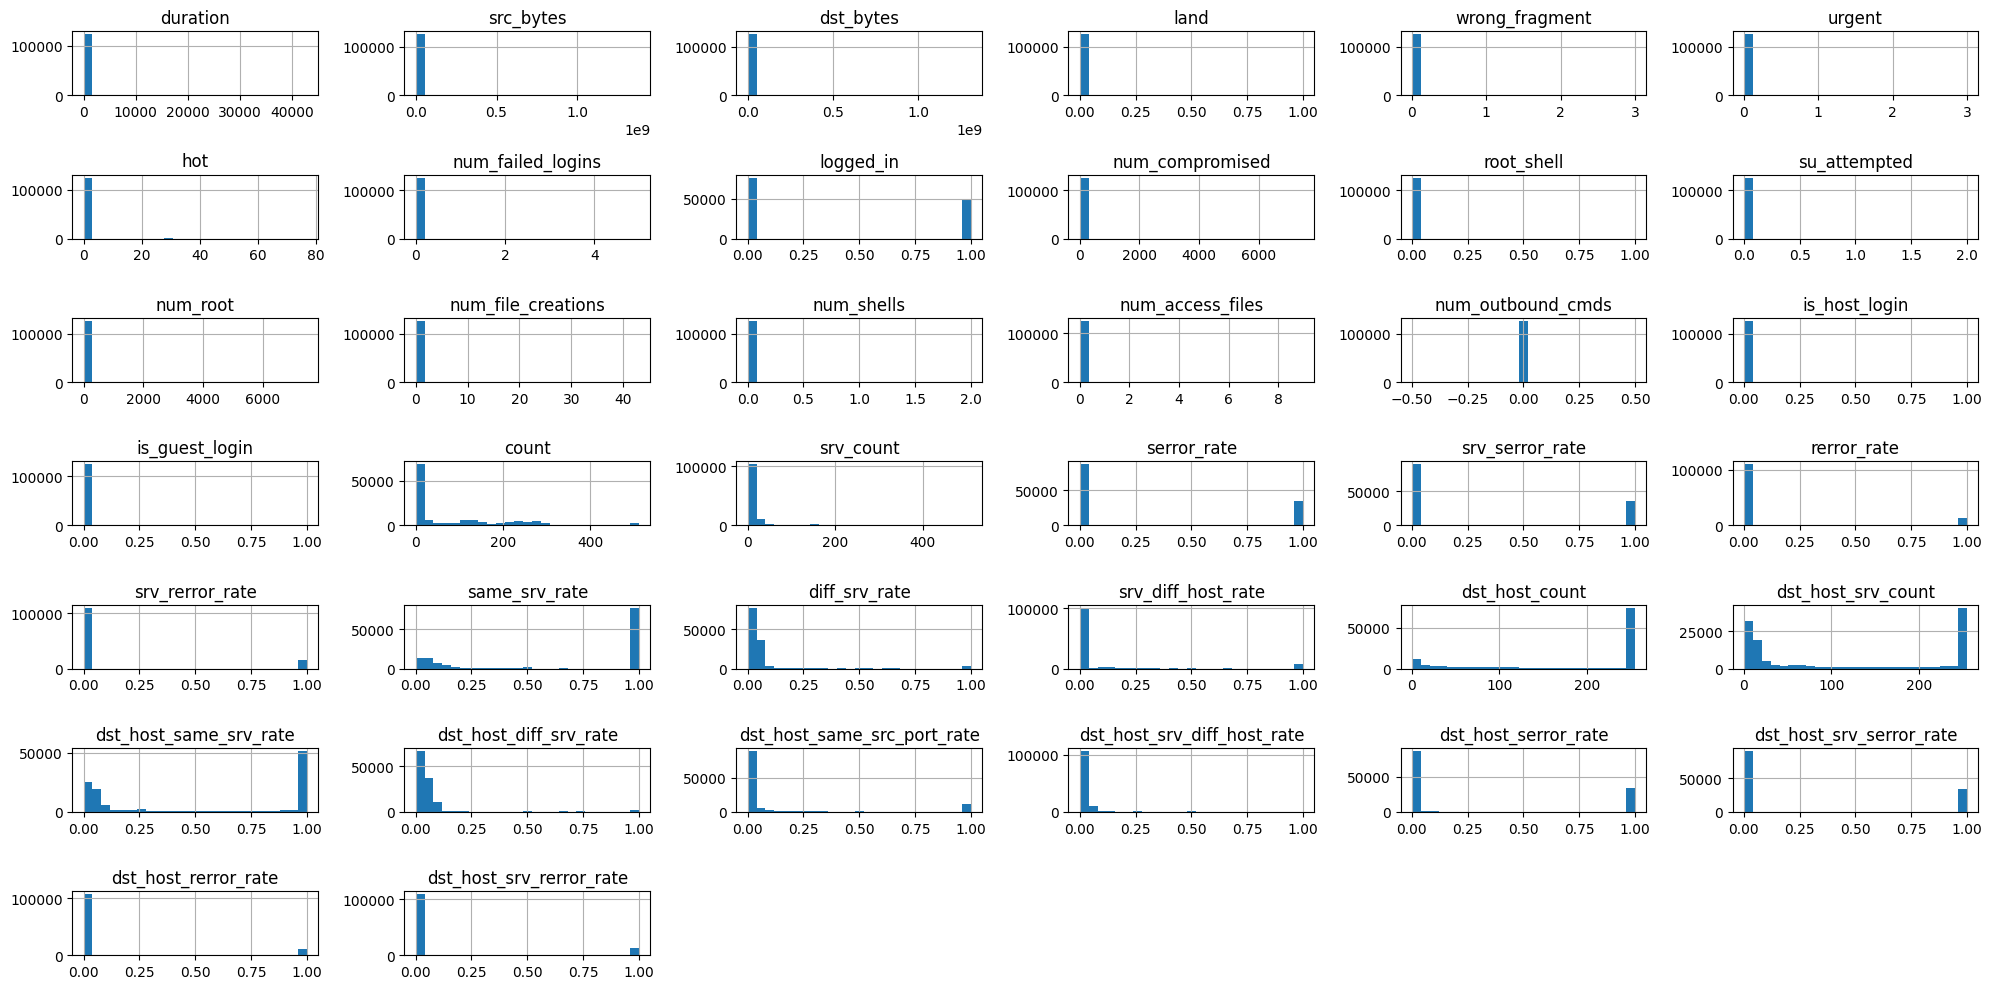

In [14]:
# Plot the histograms
data.hist(bins=25, figsize=(20, 10))

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('histograms.png', format='png')
plt.show()

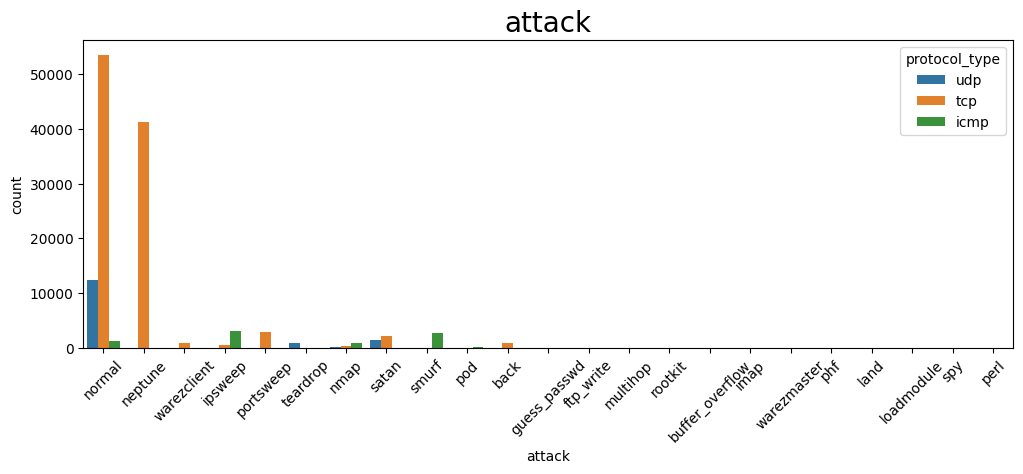

In [15]:
# checking relation between attacks and protocol types
plt.figure(figsize=(12,4))
sns.countplot(x='attack',data=data,hue='protocol_type')
plt.xticks(rotation=45)
plt.title('attack',fontdict={'fontsize':20})
plt.savefig('attack_protocol.png', format='png')
plt.show()

We can see that attacks occur more for tcp protocol, then udp, then icmp.

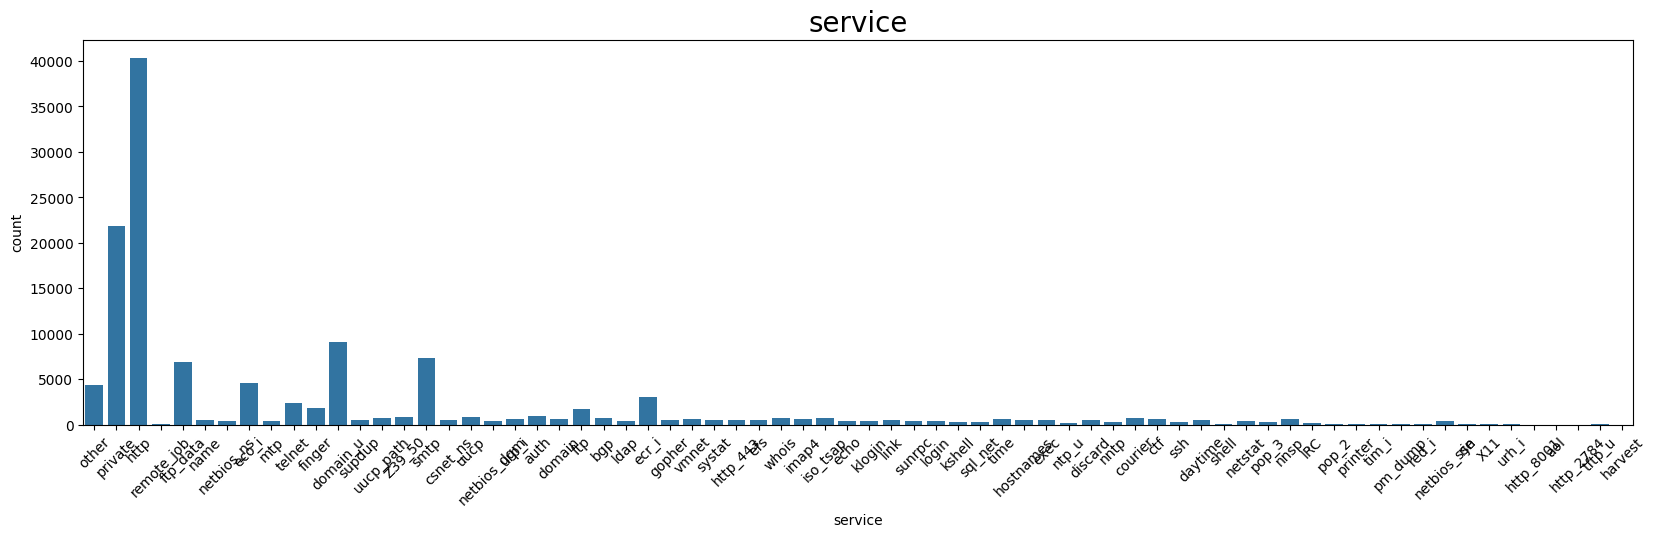

In [20]:
# checking the most service used
plt.figure(figsize=(20,5))
sns.countplot(x='service',data=data)
plt.xticks(rotation=45)
plt.title('service',fontdict={'fontsize':20})
plt.savefig('service.png', format='png')
plt.show()
# t = sns.countplot(x='service', data = data)
# t.set_xticklabels(t.get_xticklabels(),rotation=90);

http is the most being used

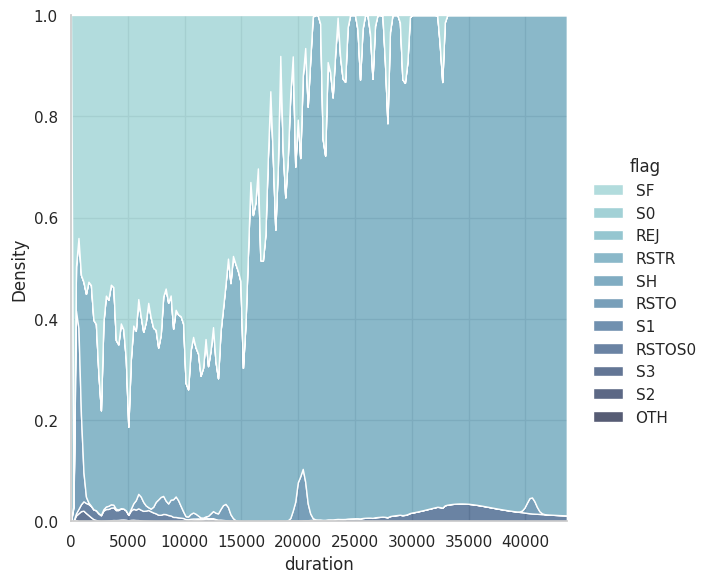

In [22]:
# checking the duration
sns.set_theme(style="whitegrid")

sns.displot(
    data=data,
    x="duration", hue="flag",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
);
plt.savefig('duration_flag.png', format='png')
plt.show()

In [23]:
data['attack'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

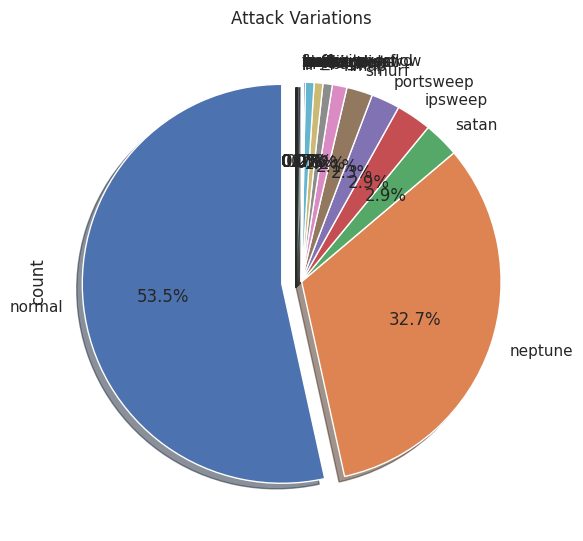

In [26]:
import matplotlib.pyplot as plt

# Create a larger figure to reduce label overlap
plt.figure(figsize=(6,6))

# Plot the pie chart
r = data.attack.value_counts().plot(
    kind='pie',
    shadow=True,
    explode=[0.1] + [0] * (data.attack.nunique() - 1),  # Dynamically set explode for only the first slice
    startangle=90,
    autopct='%1.1f%%'
)

# Ensure no overlapping by adjusting the layout
plt.tight_layout()

# Set title
plt.title('Attack Variations')

# Save as PNG file
plt.savefig('attack_variations_pie_chart.png', format='png')

# Show plot
plt.show()


In [27]:
# the labels are unbalanced so we group together small malicious attacks in one category
data["attack"] = np.where(data["attack"] != "normal", 'malicious','normal')


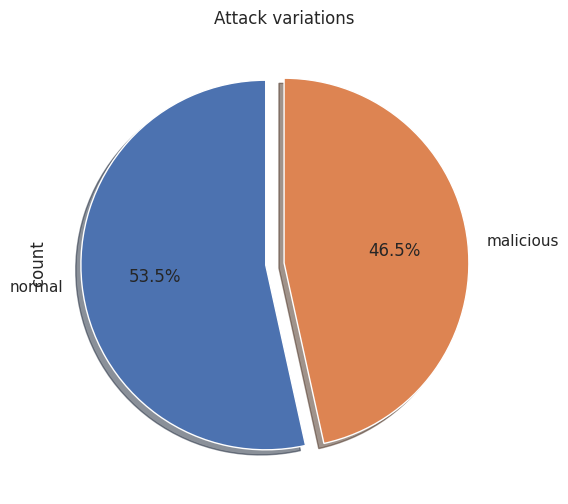

In [31]:
plt.figure(figsize = (6,6))
r = data.attack.value_counts().plot(kind='pie',shadow=True, explode=(0.1, 0), startangle=90,autopct='%1.1f%%')
r.set_xticklabels(r.get_xticklabels(),rotation=90);
plt.title('Attack variations')
plt.savefig('binary_attack_variations_pie_chart.png', format='png')
plt.show()

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

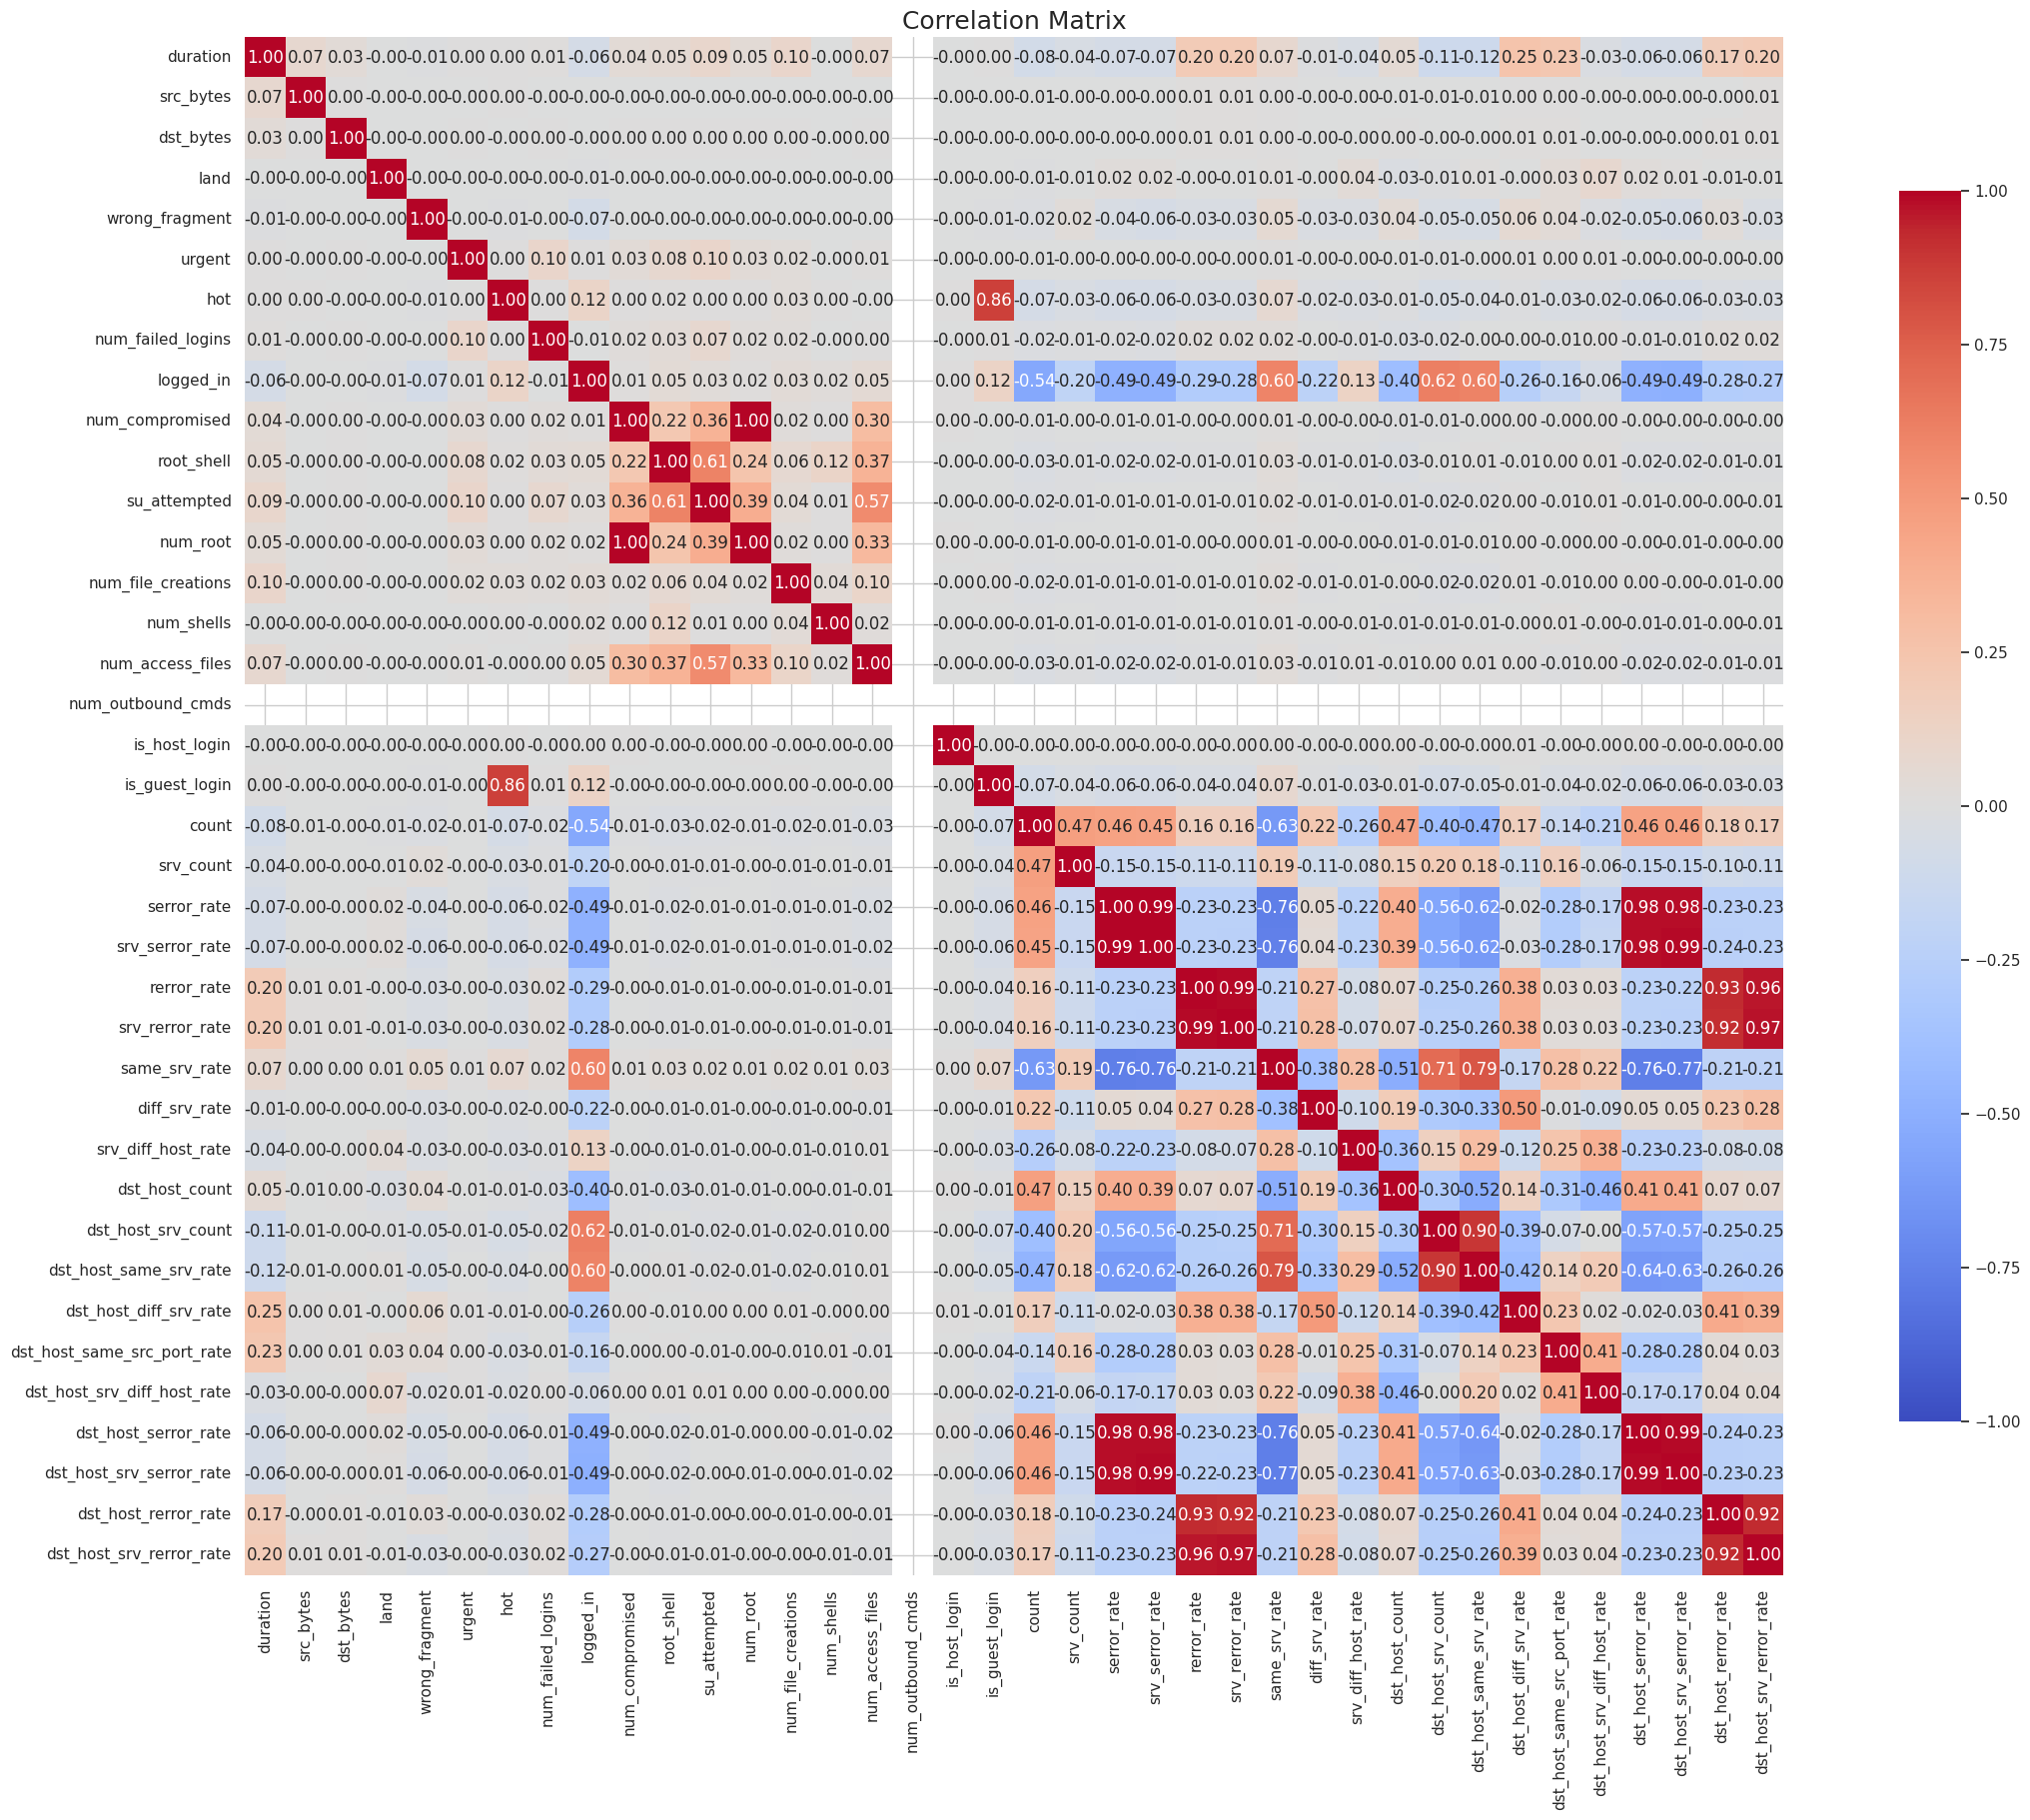

In [41]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Calculate correlation on numeric data only
corr_matrix = numeric_data.corr()

# Plot the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix", size=18)
plt.savefig("correlation_matrix.png", format="png", dpi=300)
plt.show()


 found this:¶

connection related features are highly correlated (rates).
host based traffic features are also highly correlated (dsts).

Cleaning the data

Duration is a critical column as its indications are somehow important but it holds many zeros and the concept of duration to be zero isn't actually acceptable, and these outliers causes the model to be very slow.
To solve this we have three ways:
We either delete all the zero rows in duration column, and that will actually make you lose a ton of data.
or we actually replace the 0 with either median or a number close to zero, so we don't actually lose the data.

In [42]:
print(data['duration'].quantile(0.50))
print(data['duration'].quantile(0.97))

## We searched for quantile ranges and we will replace later.

0.0
31.0


In [43]:
print(data.isnull().values.any())

False


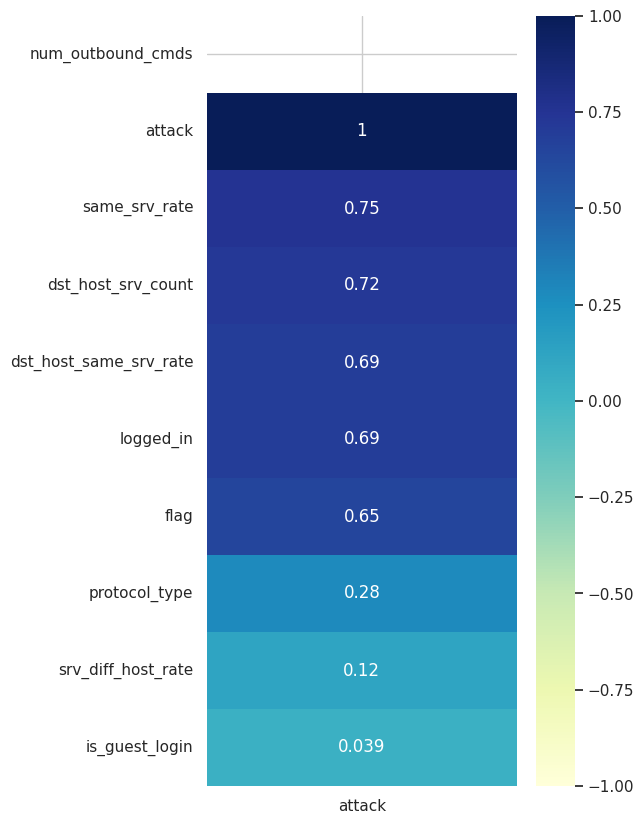

In [46]:
le = LabelEncoder()
data['protocol_type']=le.fit_transform(data['protocol_type'])
data['service']=le.fit_transform(data['service'])
data['flag']=le.fit_transform(data['flag'])
data['attack']=le.fit_transform(data['attack'])
fig, ax = plt.subplots(figsize=(5,10))

sns.heatmap(data.corr()[['attack']].sort_values('attack').tail(10),
 vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);

ax.invert_yaxis()
# save the image
plt.savefig('correlation_attack.png', format='png')

Outliers:
We are going to use two methods to deal with oultiers:
1) Deletion by boxplot identification.
2) Standardization.
add Codeadd Markdown
__
add Codeadd Markdown
To look for ouliers we use boxplo

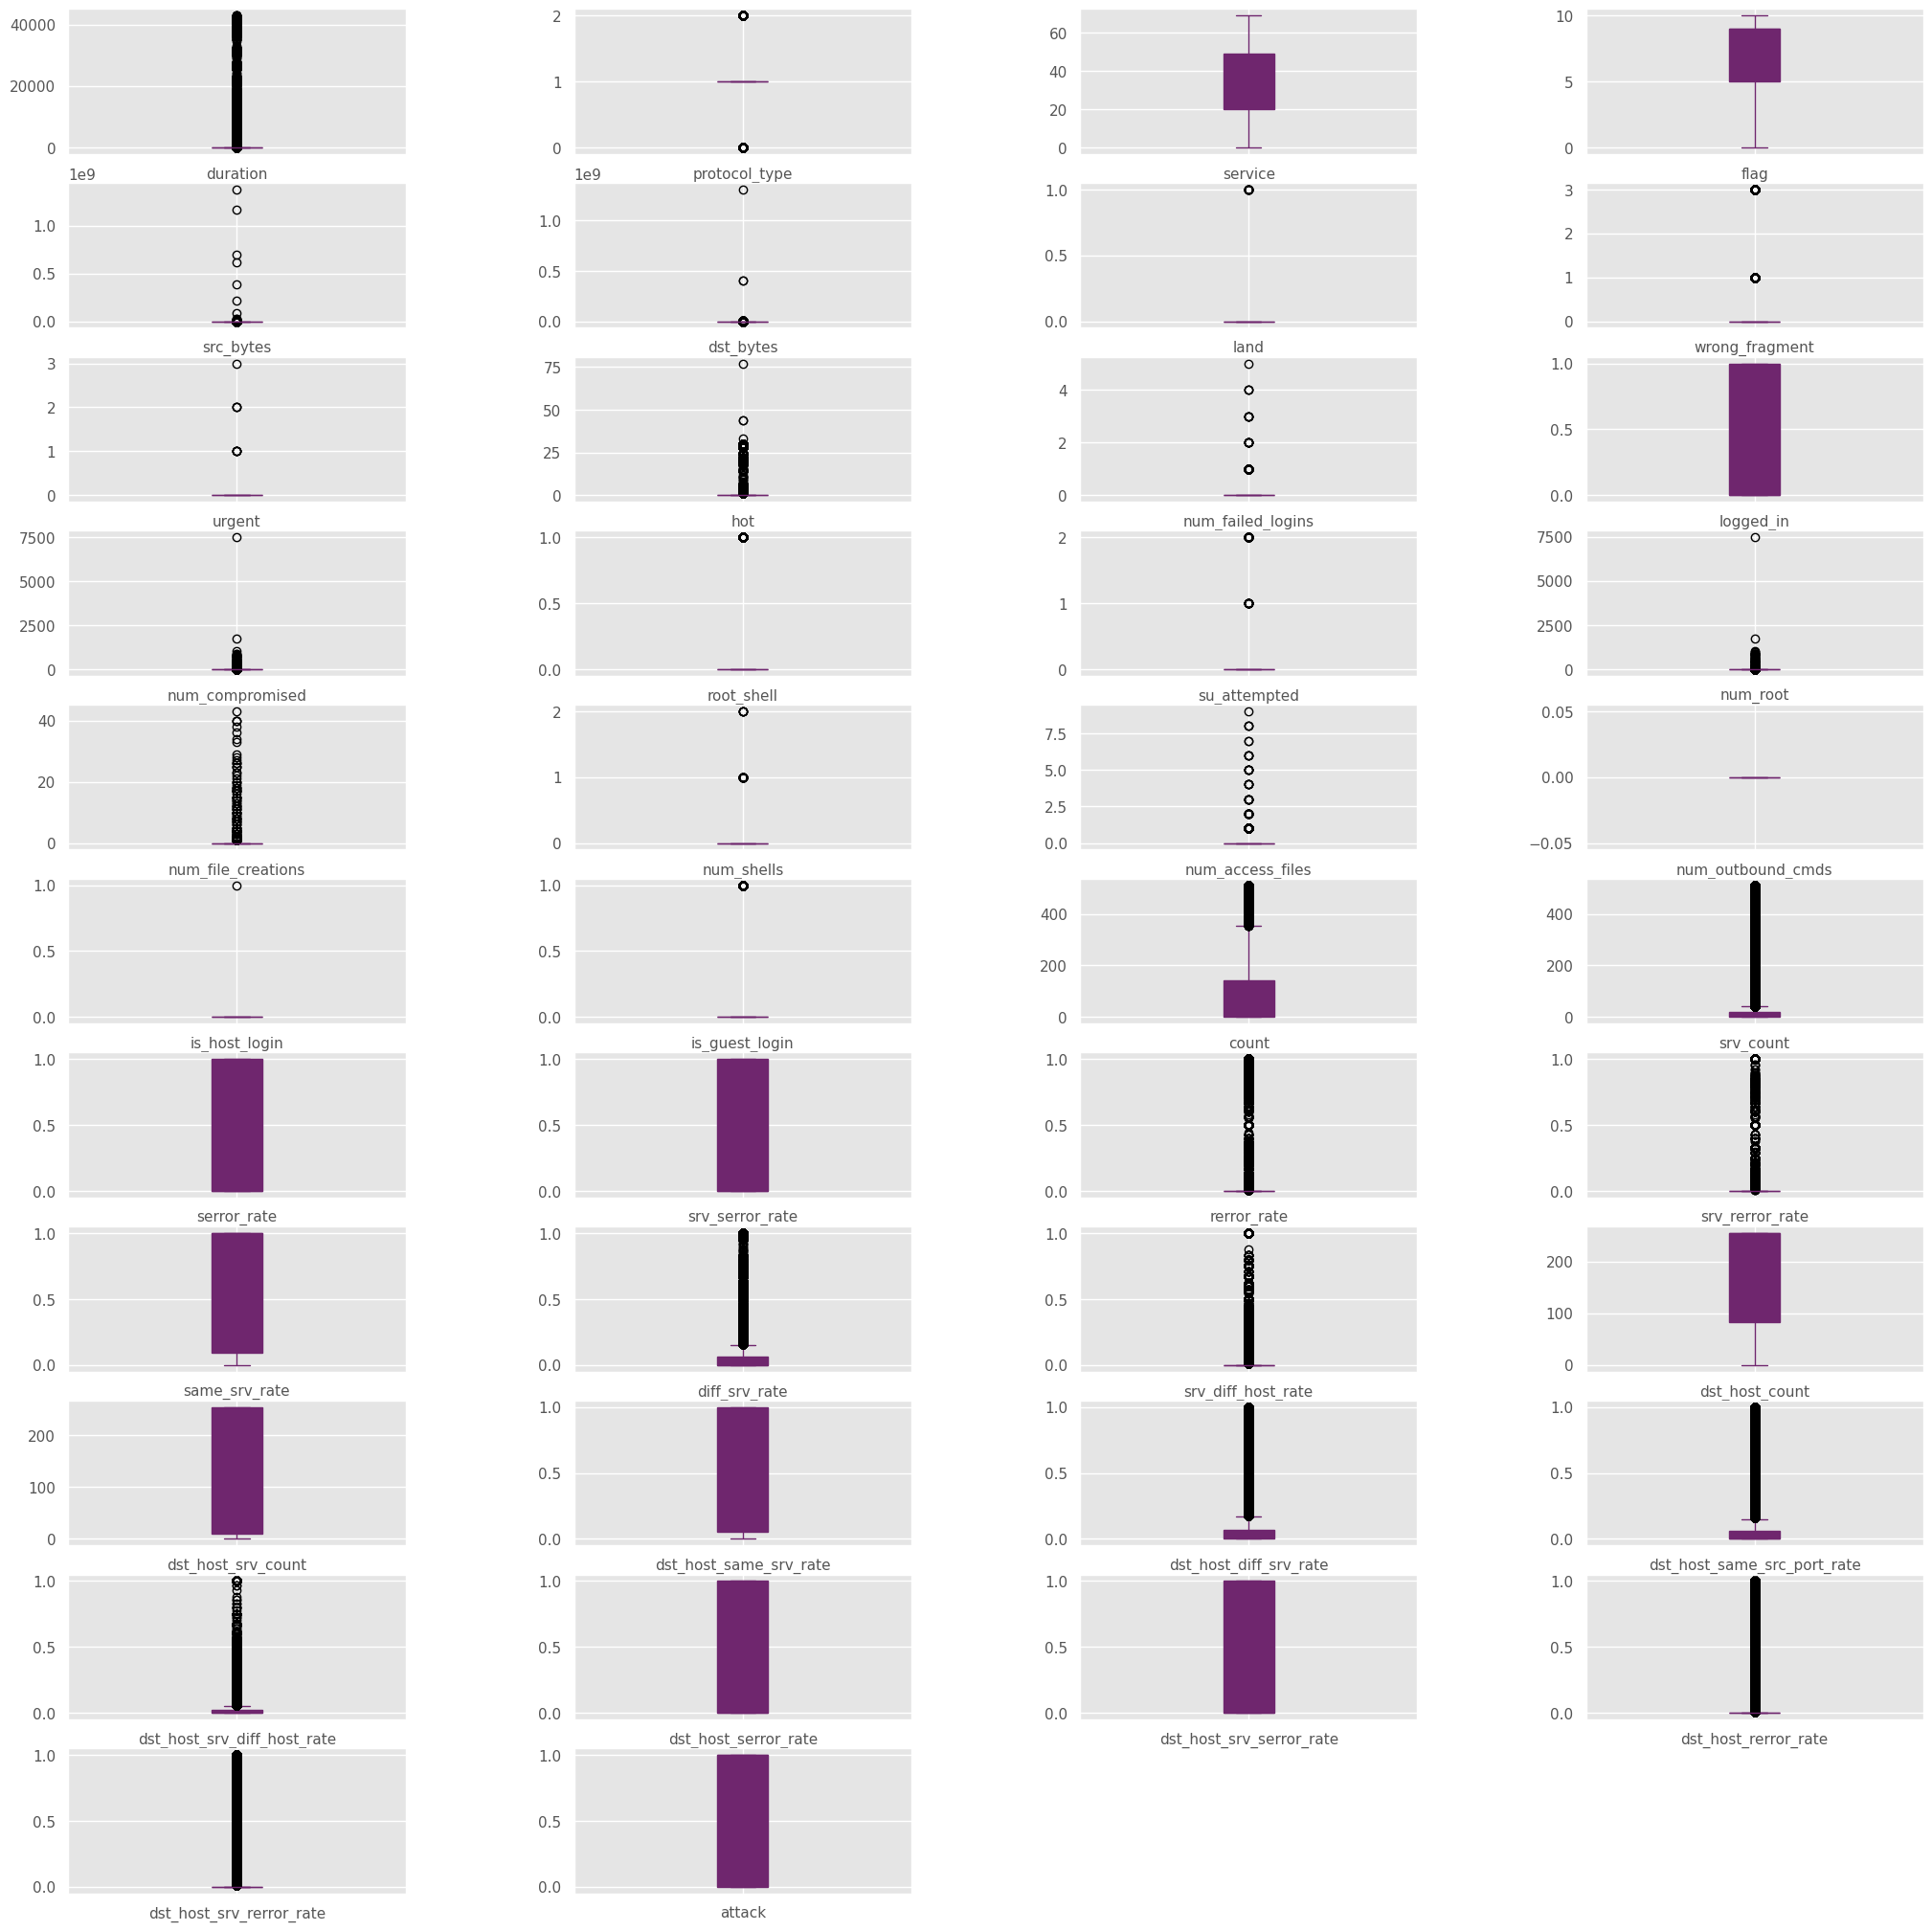

<Figure size 640x480 with 0 Axes>

In [48]:
nums = data.select_dtypes(exclude=["object"])
nums.plot(subplots = True , kind ='box', layout = (15,4), figsize = (25,35), patch_artist= True ,color = "#6F266E")
plt.subplots_adjust(wspace = 0.5)
plt.style.use("ggplot")
plt.show()
# save the image
plt.savefig('boxplot.png', format='png')

In [49]:
# detecting outliers
data = data.drop(data[data['dst_bytes']>1500].index)
data = data.drop(data[data['src_bytes']>750].index)
print(data['duration'].quantile(0.10))
print(data['duration'].quantile(0.97))
data['duration'] = np.where(data['duration'] > 31, 0, data['duration'])

0.0
43.33999999999651


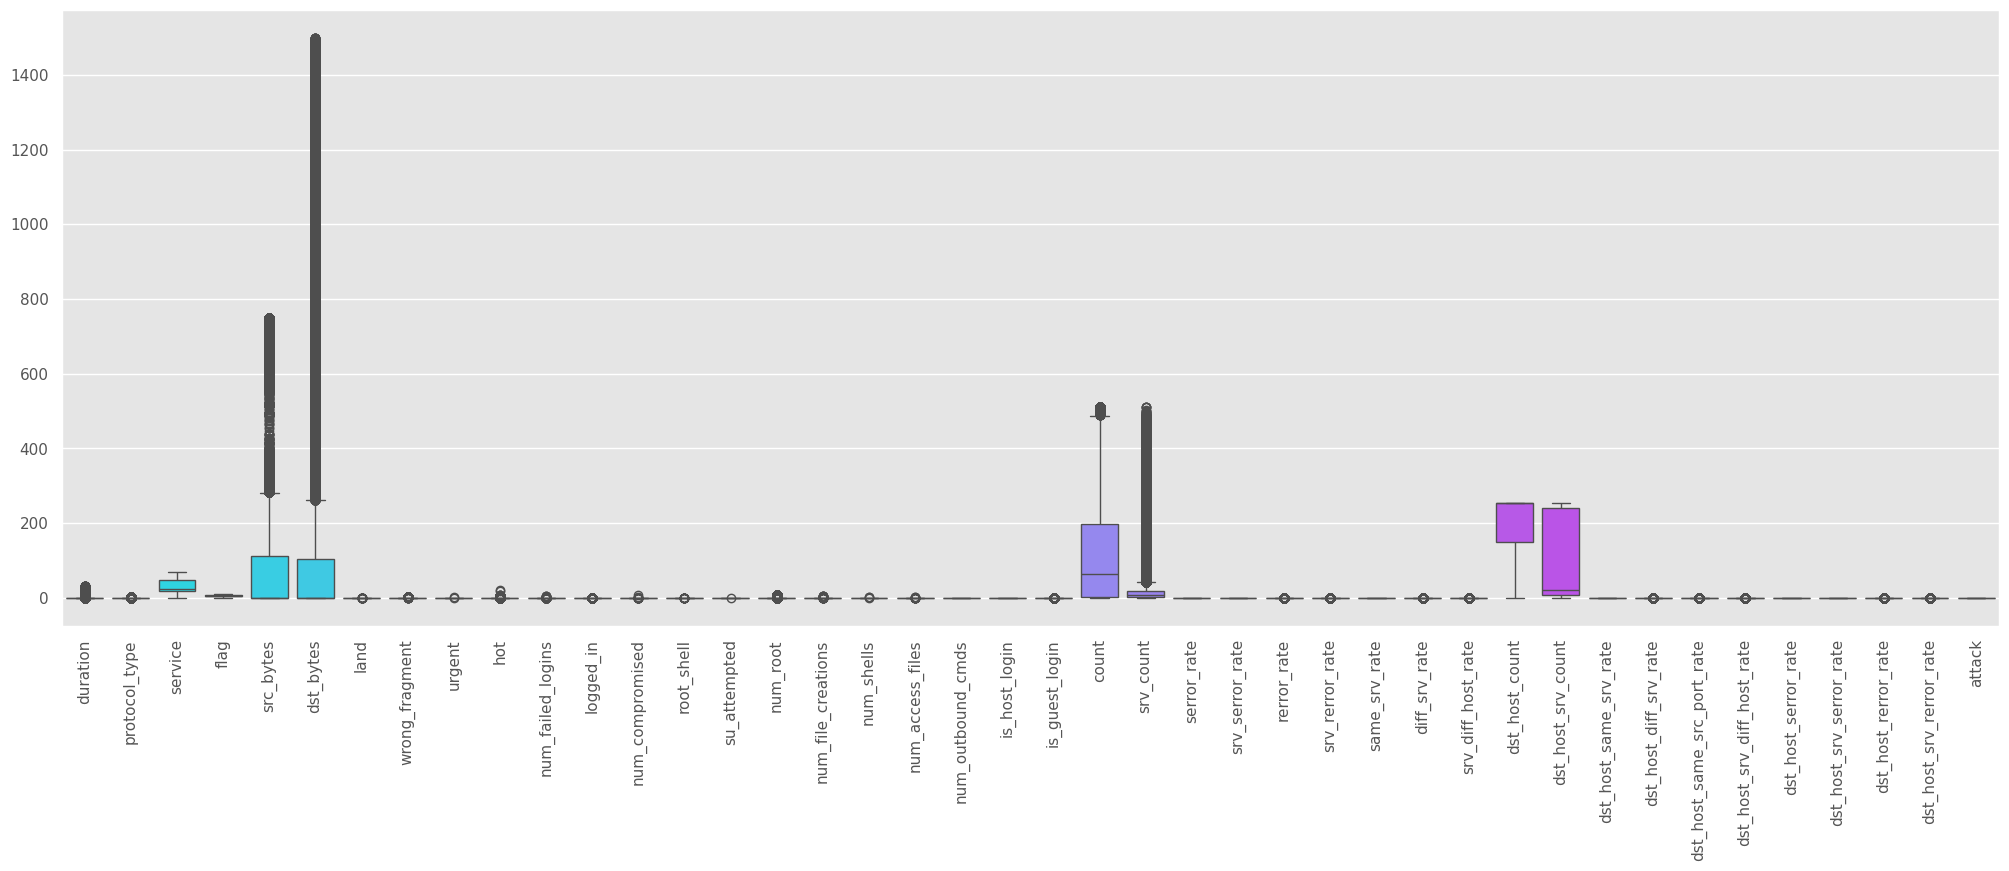

In [50]:
plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=data)
u.set_xticklabels(u.get_xticklabels(),rotation=90);

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=data
VIF=pd.Series([variance_inflation_factor(vif_data.values,i)
for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

,0
duration,1.813811
protocol_type,16.173738
service,6.552518
flag,50.397607
src_bytes,4.493139
dst_bytes,3.366866
land,1.025910
wrong_fragment,1.395067
urgent,1.001292
hot,6.891732


In [52]:
def MC_remover(data):
    vif=pd.Series([variance_inflation_factor(data.values,i)for i in range(data.shape[1])],index=data.columns)
    if vif.max()>5:
        print(vif[vif == vif.max()].index[0],'has been removed')
        data = data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
        print("No multicollinearity present anymore")
        return data

In [53]:
for i in range(10):
    vif_data=MC_remover(vif_data)
vif_data.head()

srv_serror_rate has been removed
dst_host_serror_rate has been removed
srv_rerror_rate has been removed
dst_host_srv_serror_rate has been removed
flag has been removed
rerror_rate has been removed
dst_host_same_srv_rate has been removed
same_srv_rate has been removed
protocol_type has been removed
dst_host_rerror_rate has been removed


,duration,service,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,serror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,attack
0,0,44,146,0,0,0,0,0,0,0,...,0.0,0.15,0.00,255,1,0.60,0.88,0.0,0.0,1
1,0,49,0,0,0,0,0,0,0,0,...,1.0,0.07,0.00,255,26,0.05,0.00,0.0,0.0,0
3,0,24,199,420,0,0,0,0,0,1,...,0.0,0.00,0.09,255,255,0.00,0.00,0.0,0.0,1
4,0,49,0,0,0,0,0,0,0,0,...,0.0,0.06,0.00,255,19,0.07,0.00,0.0,1.0,0
5,0,49,0,0,0,0,0,0,0,0,...,1.0,0.06,0.00,255,9,0.05,0.00,0.0,0.0,0


In [54]:
x = data.drop(['attack'] , axis = 1).values
y = data['attack'].values
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.2 , random_state=42)
from sklearn.preprocessing import RobustScaler
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, RobustScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the data and set column names
data = pd.read_csv("KDDTrain+.txt", header=None)
columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent',
           'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root',
           'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login',
           'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
           'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
           'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
           'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack', 'level']
data.columns = columns
data = data.drop('level', axis=1)
data["attack"] = np.where(data["attack"] != "normal", 'malicious', 'normal')



# Separate feature types for transformation
categorical_features = ['service','flag','protocol_type']
numeric_features = data.drop(columns=['attack'] + categorical_features).columns.tolist()

# ColumnTransformer to handle categorical and numerical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

# Build the pipeline with ColumnTransformer output column names
pipeline = Pipeline([
    ('preprocessor', preprocessor),                          # Encoding categorical variables
    ('scaler', RobustScaler()),                              # Scale features
    ('model', GradientBoostingClassifier())                  # Model (can be any classifier)
])

# Separate features and target
columns_to_drop = ['srv_serror_rate' ,
'dst_host_serror_rate',
'srv_rerror_rate' ,
'dst_host_srv_serror_rate',
'rerror_rate' ,
'dst_host_same_srv_rate',
'same_srv_rate,dst_host_rerror_rate' ]
X = data.drop('attack', axis=1)
y = LabelEncoder().fit_transform(data['attack'])      # Encode target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)


In [87]:
# prompt: help me see the classificiation report for y_pred

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     11773
           1       0.99      1.00      0.99     13422

    accuracy                           0.99     25195
   macro avg       0.99      0.99      0.99     25195
weighted avg       0.99      0.99      0.99     25195



In [88]:
# prompt: help me put the pipeline in pickle file

import pickle
from sklearn.metrics import classification_report

# Assuming your pipeline is named 'pipeline' and you've already trained it

# Save the pipeline to a file
with open('gradient_boost_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)


In [89]:

from sklearn.metrics import classification_report

# Load the test data and set column names
test_data = pd.read_csv("KDDTest+.txt", header=None)
test_data.columns = columns
test_data = test_data.drop('level', axis=1)
test_data["attack"] = np.where(test_data["attack"] != "normal", 'malicious', 'normal')

# Separate features and target for test data
X_test_new = test_data.drop('attack', axis=1)
y_test_new = LabelEncoder().fit_transform(test_data['attack'])

# Make predictions using the trained pipeline
y_pred_new = pipeline.predict(X_test_new)

# Print the classification report for the test data
print(classification_report(y_test_new, y_pred_new))

# print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_new, y_pred_new))

              precision    recall  f1-score   support

           0       0.97      0.67      0.80     12833
           1       0.69      0.97      0.81      9711

    accuracy                           0.80     22544
   macro avg       0.83      0.82      0.80     22544
weighted avg       0.85      0.80      0.80     22544

[[8643 4190]
 [ 256 9455]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, RobustScaler, OneHotEncoder
from sklearn.svm import SVC  # Import the Support Vector Classifier
from sklearn.base import BaseEstimator, TransformerMixin

# Load the data and set column names
data = pd.read_csv("KDDTrain+.txt", header=None)
columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent',
           'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root',
           'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login',
           'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
           'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
           'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
           'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack', 'level']
data.columns = columns
data = data.drop('level', axis=1)
data["attack"] = np.where(data["attack"] != "normal", 'malicious', 'normal')

# Separate feature types for transformation
categorical_features = ['service', 'flag', 'protocol_type']
numeric_features = data.drop(columns=['attack'] + categorical_features).columns.tolist()

# ColumnTransformer to handle categorical and numerical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

# Build the pipeline with ColumnTransformer output column names and using SVM as the model
pipeline_svm = Pipeline([
    ('preprocessor', preprocessor),                          # Encoding categorical variables
    ('scaler', RobustScaler()),                              # Scale features
    ('model', SVC(kernel='linear', random_state=42))         # Model (Support Vector Classifier with a linear kernel)
])

# Separate features and target
columns_to_drop = ['srv_serror_rate', 'dst_host_serror_rate', 'srv_rerror_rate', 'dst_host_srv_serror_rate',
                   'rerror_rate', 'dst_host_same_srv_rate', 'same_srv_rate', 'dst_host_rerror_rate']

X = data.drop('attack', axis=1)
y = LabelEncoder().fit_transform(data['attack'])  # Encode target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the SVM pipeline
pipeline_svm.fit(X_train, y_train)

# Predict on test data
y_pred_svm = pipeline_svm.predict(X_test)

# You can now evaluate performance on the SVM model, just like in your original pipeline:
from sklearn.metrics import accuracy_score, classification_report

print("SVM Model Accuracy: ", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
